In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA,TruncatedSVD, NMF
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from kmodes.kmodes import KModes

In [2]:
customers_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_customers_dataset.csv.zip')
order_items_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_items_dataset.csv.zip')
products_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_products_dataset.csv.zip')
translation_data = pd.read_csv('/Users/fabiobisognin/Desktop/product_category_name_translation.csv')
orders_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_orders_dataset.csv.zip')
trasaction_data= pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_payments_dataset.csv.zip')

CAMBIO NOMBRE DE CATEGORÍAS A INGLÉS

In [3]:
category_translations = dict(zip(translation_data['product_category_name'],translation_data['product_category_name_english']))
products_data = products_data.replace({'product_category_name':category_translations})


JUNTO LA DATA INCLUYENDO SOLO LO QUE NECESITO

In [4]:
category= products_data[['product_id', 'product_category_name']]

In [5]:
order_items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:

segment_data = pd.merge(customers_data, orders_data, on='customer_id', how='outer')
segment_data = pd.merge(segment_data, trasaction_data, on='order_id', how='outer')
segment_data = pd.merge(segment_data, order_items_data, on='order_id', how='outer')
data = pd.merge(segment_data, category, on='product_id', how='outer')




In [7]:
data['orders']= 1

In [8]:
df= data.drop(['order_id','customer_id','customer_zip_code_prefix', 'customer_city', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'payment_sequential', 'payment_installments', 'product_id', 'seller_id', 'shipping_limit_date', 'freight_value'], axis=1)

In [9]:
df.order_item_id.value_counts()

1.0     103057
2.0      10239
3.0       2376
4.0        986
5.0        469
6.0        262
7.0         60
8.0         36
9.0         28
10.0        25
11.0        17
12.0        13
13.0         8
14.0         7
15.0         5
20.0         3
17.0         3
19.0         3
18.0         3
16.0         3
21.0         1
Name: order_item_id, dtype: int64

In [10]:
df.isnull().sum()

customer_unique_id          0
customer_state              0
payment_type                3
payment_value               3
order_item_id             830
price                     830
product_category_name    2528
orders                      0
dtype: int64

In [11]:
df.shape

(118434, 8)

In [12]:
df = df.dropna()

In [13]:
df.shape

(115903, 8)

In [14]:
df.describe()

,payment_value,order_item_id,price,orders
count,115903.000000,115903.000000,115903.000000,115903.0
mean,173.035495,1.196302,120.947333,1.0
std,268.128335,0.699505,184.260929,0.0
min,0.000000,1.000000,0.850000,1.0
25%,61.010000,1.000000,39.900000,1.0
50%,108.200000,1.000000,74.900000,1.0
75%,189.740000,1.000000,134.900000,1.0
max,13664.080000,21.000000,6735.000000,1.0


In [15]:
df.columns

Index(['customer_unique_id', 'customer_state', 'payment_type', 'payment_value',
       'order_item_id', 'price', 'product_category_name', 'orders'],
      dtype='object')

In [16]:
df.customer_state.value_counts()


SP    48850
RJ    15092
MG    13455
RS     6386
PR     5882
SC     4237
BA     3975
DF     2440
GO     2376
ES     2319
PE     1865
CE     1533
MT     1113
PA     1096
MS      834
MA      833
PB      629
PI      566
RN      563
AL      454
SE      395
TO      334
RO      280
AM      169
AC       93
AP       84
RR       50
Name: customer_state, dtype: int64

In [17]:

cu = pd.get_dummies(df, columns=['payment_type', 'product_category_name', 'customer_state'], prefix = ['pay', 'cat', ''])



In [18]:
cu

,customer_unique_id,payment_value,order_item_id,price,orders,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cat_agro_industry_and_commerce,...,_PR,_RJ,_RN,_RO,_RR,_RS,_SC,_SE,_SP,_TO
0,861eff4711a542e4b93843c6dd7febb0,146.87,1.0,124.99,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,9eae34bbd3a474ec5d07949ca7de67c0,275.79,1.0,112.99,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9eae34bbd3a474ec5d07949ca7de67c0,275.79,2.0,112.99,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3c799d181c34d51f6d44bbbc563024db,140.61,1.0,124.99,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,23397e992b09769faf5e66f9e171a241,137.58,1.0,106.99,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,5f2971f9805e3ccb030226e30c8e8390,30.95,1.0,19.99,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
118430,c64ede6d0ae8901b1b6fb03528c1b7e6,304.11,1.0,250.00,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118431,046470763123d3d6364f89095b4e47ab,92.36,1.0,84.90,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
118432,82d46759af0369aad49084bacf85a6c3,167.79,1.0,167.99,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
col=cu.columns
col

Index(['customer_unique_id', 'payment_value', 'order_item_id', 'price',
       'orders', 'pay_boleto', 'pay_credit_card', 'pay_debit_card',
       'pay_voucher', 'cat_agro_industry_and_commerce',
       ...
       '_PR', '_RJ', '_RN', '_RO', '_RR', '_RS', '_SC', '_SE', '_SP', '_TO'],
      dtype='object', length=109)

In [20]:
cu=cu.groupby('customer_unique_id').agg({'payment_value':'mean', \
            'orders':'sum', 'price':'sum', 'order_item_id': 'max','payment_value':'mean',
       'order_item_id':'sum', 'pay_boleto':'sum', 'pay_credit_card':'sum',
       'pay_debit_card':'sum', 'pay_voucher':'sum', 'cat_agro_industry_and_commerce':'sum',
       'cat_air_conditioning':'sum', 'cat_art':'sum', 'cat_arts_and_craftmanship':'sum',
       'cat_audio':'sum', 'cat_auto':'sum', 'cat_baby':'sum', 'cat_bed_bath_table':'sum',
       'cat_books_general_interest':'sum', 'cat_books_imported':'sum',
       'cat_books_technical':'sum', 'cat_cds_dvds_musicals':'sum',
       'cat_christmas_supplies':'sum', 'cat_cine_photo':'sum', 'cat_computers':'sum',
       'cat_computers_accessories':'sum', 'cat_consoles_games':'sum',
       'cat_construction_tools_construction':'sum', 'cat_construction_tools_lights':'sum',
       'cat_construction_tools_safety':'sum', 'cat_cool_stuff':'sum',
       'cat_costruction_tools_garden':'sum', 'cat_costruction_tools_tools':'sum',
       'cat_diapers_and_hygiene':'sum', 'cat_drinks':'sum', 'cat_dvds_blu_ray':'sum',
       'cat_electronics':'sum', 'cat_fashio_female_clothing':'sum',
       'cat_fashion_bags_accessories':'sum', 'cat_fashion_childrens_clothes':'sum',
       'cat_fashion_male_clothing':'sum', 'cat_fashion_shoes':'sum', 'cat_fashion_sport':'sum',
       'cat_fashion_underwear_beach':'sum', 'cat_fixed_telephony':'sum', 'cat_flowers':'sum',
       'cat_food':'sum', 'cat_food_drink':'sum', 'cat_furniture_bedroom':'sum',
       'cat_furniture_decor':'sum', 'cat_furniture_living_room':'sum',
       'cat_furniture_mattress_and_upholstery':'sum', 'cat_garden_tools':'sum',
       'cat_health_beauty':'sum', 'cat_home_appliances':'sum', 'cat_home_appliances_2':'sum',
       'cat_home_comfort_2':'sum', 'cat_home_confort':'sum', 'cat_home_construction':'sum',
       'cat_housewares':'sum', 'cat_industry_commerce_and_business':'sum',
       'cat_kitchen_dining_laundry_garden_furniture':'sum', 'cat_la_cuisine':'sum',
       'cat_luggage_accessories':'sum', 'cat_market_place':'sum', 'cat_music':'sum',
       'cat_musical_instruments':'sum', 'cat_office_furniture':'sum', 'cat_party_supplies':'sum',
       'cat_pc_gamer':'sum', 'cat_perfumery':'sum', 'cat_pet_shop':'sum',
       'cat_portateis_cozinha_e_preparadores_de_alimentos':'sum',
       'cat_security_and_services':'sum', 'cat_signaling_and_security':'sum',
       'cat_small_appliances':'sum', 'cat_small_appliances_home_oven_and_coffee':'sum',
       'cat_sports_leisure':'sum', 'cat_stationery':'sum', 'cat_tablets_printing_image':'sum',
       'cat_telephony':'sum', 'cat_toys':'sum', 'cat_watches_gifts':'sum', '_SP':'sum',
'_RJ':'sum',
'_MG' :'sum',
'_RS' :'sum',
'_PR' :'sum',
'_SC' :'sum',
'_BA' :'sum',
'_DF' :'sum',
'_GO' :'sum',
'_ES' :'sum',
'_PE' :'sum',
'_CE' :'sum',
'_MT' :'sum',
'_PA' :'sum',
'_MS' :'sum',
'_MA' :'sum',
'_PB' :'sum',
'_PI' :'sum',
'_RN' :'sum',
'_AL' :'sum',
'_SE' :'sum',
'_TO' :'sum',
'_RO' :'sum',
'_AM' :'sum',
'_AC' :'sum',
'_AP':'sum',
'_RR' :'sum'})

In [21]:
cu

,payment_value,orders,price,order_item_id,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cat_agro_industry_and_commerce,cat_air_conditioning,...,_PI,_RN,_AL,_SE,_TO,_RO,_AM,_AC,_AP,_RR
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,1,129.90,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,1,18.90,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000f46a3911fa3c0805444483337064,86.22,1,69.00,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0000f6ccb0745a6a4b88665a16c9f078,43.62,1,25.99,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0004aac84e0df4da2b147fca70cf8255,196.89,1,180.00,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2,1570.00,3.0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,84.58,1,64.89,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffff371b4d645b6ecea244b27531430a,112.46,1,89.90,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
a, b = 0, 1
x, y = cu.payment_value.min(), cu.payment_value.max()
cu['avg_ticket'] = (cu.payment_value - x) / (y - x) * (b - a) + a

In [23]:
a, b = 0, 1
x, y = cu.price.min(), cu.price.max()
cu['avg_value'] = (cu.price - x) / (y - x) * (b - a) + a

In [24]:
cu= cu.drop(['payment_value', 'price'], axis=1)

In [25]:
cu

,orders,order_item_id,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cat_agro_industry_and_commerce,cat_air_conditioning,cat_art,cat_arts_and_craftmanship,...,_AL,_SE,_TO,_RO,_AM,_AC,_AP,_RR,avg_ticket,avg_value
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.010250,0.009603
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.001854,0.001343
0000f46a3911fa3c0805444483337064,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.006175,0.005071
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.003057,0.001871
0004aac84e0df4da2b147fca70cf8255,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.014275,0.013330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,3.0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.151188,0.116760
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.006055,0.004765
ffff371b4d645b6ecea244b27531430a,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.008096,0.006626


# K-MEANS

In [26]:
from sklearn.cluster import KMeans

In [27]:
cols= cu.columns
cols

Index(['orders', 'order_item_id', 'pay_boleto', 'pay_credit_card',
       'pay_debit_card', 'pay_voucher', 'cat_agro_industry_and_commerce',
       'cat_air_conditioning', 'cat_art', 'cat_arts_and_craftmanship',
       ...
       '_AL', '_SE', '_TO', '_RO', '_AM', '_AC', '_AP', '_RR', 'avg_ticket',
       'avg_value'],
      dtype='object', length=108)

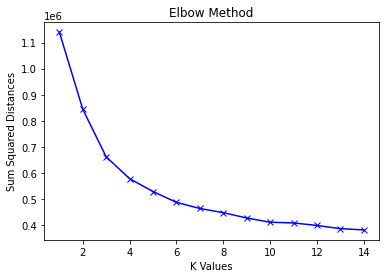

In [28]:
K = range(1,15)
sum_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(cu[cols])
  sum_squared_distances.append(model.inertia_)
plt.plot(K, sum_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum Squared Distances")
plt.title("Elbow Method")
plt.show()

In [29]:
#Identificamos 8 clusters
kmeans = KMeans(n_clusters=8)
cu_clusters = kmeans.fit(cu[cols])

In [30]:
len(cu_clusters.cluster_centers_)

8

In [31]:
cu_clusters.cluster_centers_

array([[ 1.00235135e+00,  1.00248649e+00,  1.47382107e-14,
         9.65513514e-01,  1.85405405e-02,  1.82972973e-02,
         1.40540541e-03,  2.24324324e-03,  2.10810811e-03,
         8.10810811e-05,  3.86486486e-03,  4.23513514e-02,
         3.26216216e-02,  8.22702703e-02,  5.54054054e-03,
         3.24324324e-04,  2.83783784e-03,  1.08108108e-04,
         1.43243243e-03,  6.48648649e-04,  2.43243243e-03,
         6.52162162e-02,  1.13783784e-02,  7.16216216e-03,
         2.27027027e-03,  1.78378378e-03,  4.47837838e-02,
         1.51351351e-03,  1.18918919e-03,  1.62162162e-04,
         2.08108108e-03,  5.94594595e-04,  2.85945946e-02,
         2.97297297e-04,  1.84054054e-02,  2.70270270e-05,
         1.10810811e-03,  2.91891892e-03,  1.89189189e-04,
         1.08108108e-03,  2.08108108e-03,  3.24324324e-04,
         3.51351351e-03,  1.94594595e-03,  8.37837838e-04,
         5.39729730e-02,  4.00000000e-03,  2.70270270e-04,
         3.51081081e-02,  9.52702703e-02,  7.32432432e-0

In [32]:
cu

,orders,order_item_id,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cat_agro_industry_and_commerce,cat_air_conditioning,cat_art,cat_arts_and_craftmanship,...,_AL,_SE,_TO,_RO,_AM,_AC,_AP,_RR,avg_ticket,avg_value
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.010250,0.009603
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.001854,0.001343
0000f46a3911fa3c0805444483337064,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.006175,0.005071
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.003057,0.001871
0004aac84e0df4da2b147fca70cf8255,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.014275,0.013330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,3.0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.151188,0.116760
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.006055,0.004765
ffff371b4d645b6ecea244b27531430a,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.008096,0.006626


ASIGNO LABELS DE CLUSTER

In [33]:
preds = cu_clusters.fit_predict(cu[cols])

In [34]:
cu['cluster']=preds

In [35]:
cu

,orders,order_item_id,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,cat_agro_industry_and_commerce,cat_air_conditioning,cat_art,cat_arts_and_craftmanship,...,_SE,_TO,_RO,_AM,_AC,_AP,_RR,avg_ticket,avg_value,cluster
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.010250,0.009603,3
0000b849f77a49e4a4ce2b2a4ca5be3f,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.001854,0.001343,3
0000f46a3911fa3c0805444483337064,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.006175,0.005071,0
0000f6ccb0745a6a4b88665a16c9f078,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.003057,0.001871,0
0004aac84e0df4da2b147fca70cf8255,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.014275,0.013330,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2,3.0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.151188,0.116760,4
fffea47cd6d3cc0a88bd621562a9d061,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.006055,0.004765,0
ffff371b4d645b6ecea244b27531430a,1,1.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.008096,0.006626,0


EXPLORO CLUSTER 1

In [36]:
clust_1= cu[cu['cluster']==1]

In [37]:
stateclust_1 = clust_1[['_RJ',
'_MG',
'_RS',
'_PR',
'_SC',
'_BA',
'_DF',
'_GO',
'_ES',
'_PE',
'_CE',
'_MT',
'_PA',
'_MS',
'_MA',
'_PB',
'_PI',
'_RN',
'_AL',
'_SE',
'_TO',
'_RO',
'_AM',
'_AC',
'_AP',
'_RR']].idxmax(axis=1)
stateclust_1.value_counts()

_RJ    285
_MG     53
_RS     29
_PR     28
_SC     17
_BA     14
_DF      8
_MT      6
_CE      6
_GO      5
_PB      4
_MS      4
_ES      4
_MA      3
_PE      3
_TO      2
_SE      2
_PA      2
_AL      1
_AM      1
_AP      1
_RO      1
_PI      1
_RN      1
_AC      1
dtype: int64

In [38]:
payclust_1 = clust_1[['pay_boleto', 'pay_credit_card','pay_debit_card', 'pay_voucher']].idxmax(axis=1)
payclust_1.value_counts()

pay_credit_card    304
pay_boleto         134
pay_voucher         37
pay_debit_card       7
dtype: int64

In [41]:
catclust_1 = clust_1[['cat_agro_industry_and_commerce',
       'cat_air_conditioning', 'cat_art', 'cat_arts_and_craftmanship',
       'cat_audio', 'cat_auto', 'cat_baby', 'cat_bed_bath_table',
       'cat_books_general_interest', 'cat_books_imported',
       'cat_books_technical', 'cat_cds_dvds_musicals',
       'cat_christmas_supplies', 'cat_cine_photo', 'cat_computers',
       'cat_computers_accessories', 'cat_consoles_games',
       'cat_construction_tools_construction', 'cat_construction_tools_lights',
       'cat_construction_tools_safety', 'cat_cool_stuff',
       'cat_costruction_tools_garden', 'cat_costruction_tools_tools',
       'cat_diapers_and_hygiene', 'cat_drinks', 'cat_dvds_blu_ray',
       'cat_electronics', 'cat_fashio_female_clothing',
       'cat_fashion_bags_accessories', 'cat_fashion_childrens_clothes',
       'cat_fashion_male_clothing', 'cat_fashion_shoes', 'cat_fashion_sport',
       'cat_fashion_underwear_beach', 'cat_fixed_telephony', 'cat_flowers',
       'cat_food', 'cat_food_drink', 'cat_furniture_bedroom',
       'cat_furniture_decor', 'cat_furniture_living_room',
       'cat_furniture_mattress_and_upholstery', 'cat_garden_tools',
       'cat_health_beauty', 'cat_home_appliances', 'cat_home_appliances_2',
       'cat_home_comfort_2', 'cat_home_confort', 'cat_home_construction',
       'cat_housewares', 'cat_industry_commerce_and_business',
       'cat_kitchen_dining_laundry_garden_furniture', 'cat_la_cuisine',
       'cat_luggage_accessories', 'cat_market_place', 'cat_music',
       'cat_musical_instruments', 'cat_office_furniture', 'cat_party_supplies',
       'cat_pc_gamer', 'cat_perfumery', 'cat_pet_shop',
       'cat_portateis_cozinha_e_preparadores_de_alimentos',
       'cat_security_and_services', 'cat_signaling_and_security',
       'cat_small_appliances', 'cat_small_appliances_home_oven_and_coffee',
       'cat_sports_leisure', 'cat_stationery', 'cat_tablets_printing_image',
       'cat_telephony', 'cat_toys', 'cat_watches_gifts']].idxmax(axis=1)
catclust_1.value_counts()

cat_furniture_decor                            80
cat_housewares                                 57
cat_computers_accessories                      47
cat_bed_bath_table                             46
cat_garden_tools                               37
cat_health_beauty                              29
cat_office_furniture                           28
cat_sports_leisure                             20
cat_watches_gifts                              11
cat_construction_tools_construction            10
cat_perfumery                                   8
cat_home_construction                           8
cat_cool_stuff                                  7
cat_electronics                                 6
cat_auto                                        6
cat_construction_tools_lights                   5
cat_baby                                        5
cat_fashion_bags_accessories                    5
cat_fixed_telephony                             5
cat_toys                                        4
